<h1 style="text-align: center;color: black;"> <b> Brain MRI Tumor Detection </b></h1>
<h4 style="text-align: center;color: gray"> <em> A Deep Learning based project to detect and segmetate brain tumors in MRI images </em> </h4>

<div style="text-align: center;">

[**Alejandro C.**](https://github.com/alc98), [**Fabián G. Martín**](https://github.com/FabsGMartin), [**Raquel Hernández**](https://github.com/RaquelH18), [**Miguel J. de la Torre**](https://github.com/migueljdlt), [**Mary Marín**](https://github.com/mmarin3011-cloud),    [**Luna Pérez T.**](https://github.com/LunaPerezT)

</div>

<br></br>

---


<h3 style="text-align: center;color: black;"><b> PART 2 : Deep Learning Classification Model Development </b></h3>

---

<br></br>

### **Libraries Overview**

For the model development pipeline, several key libraries were used to build, train, and evaluate the deep learning architecture for low-grade glioma (LGG) classification.  
Together, these tools provide image preprocessing, model construction, training optimization, and performance assessment.

- **pandas & numpy:** Essential for data manipulation, label handling, and numerical operations throughout the dataset preparation and evaluation.
- **seaborn & matplotlib:** Used to visualize class distributions, training curves, confusion matrices, and other diagnostic plots during model analysis.
- **tensorflow / keras:** The core deep learning framework used to build and train the model.  
  - *ResNet50:* Employed as the backbone CNN for feature extraction.  
  - *Layers & Model APIs:* Used to customize the classification head and assemble the final architecture.  
  - *Callbacks:* EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint automated model optimization, preventing overfitting and improving generalization.
- **ImageDataGenerator:** Enabled image augmentation, preprocessing, and efficient data loading to enrich the training dataset and improve robustness.
- **scikit-learn:** Provided evaluation metrics such as accuracy, recall, precision, F1-score, ROC curves, confusion matrices, and train–test splitting utilities.
- **IPython display tools:** Used to visualize sample predictions, training progression, and model outputs directly in the notebook.
- **google.colab files:** Assisted with importing and exporting model outputs or dataset assets when working in Colab.


Together, these libraries form the technical backbone of the project, enabling us to preprocess MRI data, design efficient deep learning pipelines, and evaluate model reliability with scientific rigor.


In [ ]:
#!pip install keras_preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras_preprocessing.image import ImageDataGenerator
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score, recall_score, RocCurveDisplay, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import random
from google.colab import files 
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Navigate to My Drive directory to store the dataset
%cd /content/drive/MyDrive/colab proyects/Tumor_Segmentation_MRI


/content/drive/MyDrive/colab proyects/Tumor_Segmentation_MRI


### **Data Loading, Spitting and Generation**

First of all we need to load again our routes dataframe.

In [ ]:
brain_df=pd.read_csv('route_label.csv',index_col=0)
brain_df.head(10)

,image_path,mask_path,mask
0,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0
1,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0
2,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0
3,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,1
4,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,1
5,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0
6,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0
7,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,1
8,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,1
9,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,./data/TCGA_CS_4941_19960909/TCGA_CS_4941_1996...,0


In [4]:
# Drop the patient id column
brain_df.shape

(3899, 3)

In [ ]:
brain_df['mask'] = brain_df['mask'].apply(lambda x: str(x))

In [12]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899 entries, 0 to 3898
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3899 non-null   object
 1   mask_path   3899 non-null   object
 2   mask        3899 non-null   object
dtypes: object(3)
memory usage: 121.8+ KB



To ensure a reliable evaluation of the model’s performance, the dataset was divided into **training** and **test** subsets. The training set was used to fit the neural network and learn meaningful imaging features related to low-grade glioma detection, while the test set was kept completely unseen during training. This separation allows us to assess how well the model generalizes to new MRI data and helps prevent overfitting, ensuring a more trustworthy and robust evaluation of real-world performance.


In [ ]:
train, test = train_test_split(brain_df, test_size = 0.15,random_state=42)

In [14]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [ ]:

# Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split = 0.15,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= '.',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= '.',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= '.',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))


Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


### **ResNet-50 Classification Model Development**

https://arxiv.org/pdf/1512.03385.pdf

In [ ]:
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe

brain_df['mask'] = brain_df['mask'].apply(lambda x: str(x))

In [ ]:
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# freeze the model weights

for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,817,218 (98.48 MB)

 Trainable params: 25,764,098 (98.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# compile the model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-resnet-model2.keras", verbose=1,save_best_only=True)


In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6813 - loss: 0.8897
Epoch 1: val_loss improved from inf to 2.39263, saving model to classifier-resnet-model2.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 920s 5s/step - accuracy: 0.6815 - loss: 0.8890 - val_accuracy: 0.6835 - val_loss: 2.3926


In [ ]:
# save the model architecture to json file for future use
checkpointer = ModelCheckpoint(filepath="classifier-resnet-model3.keras", verbose=1,save_best_only=True)
model.load_weights("./classifier-resnet-model3.keras")
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9331 - loss: 0.1858
Epoch 1: val_loss improved from inf to 0.57614, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - accuracy: 0.9331 - loss: 0.1858 - val_accuracy: 0.8629 - val_loss: 0.5761
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 48s 276ms/step - accuracy: 1.0000 - loss: 0.0286
Epoch 2: val_loss improved from 0.57614 to 0.57363, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 0.8629 - val_loss: 0.5736
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9311 - loss: 0.1809
Epoch 3: val_loss improved from 0.57363 to 0.25663, saving model to classifier-resnet-model3.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.9311 - loss: 0.1809 - val_accuracy: 0.9153 - val_loss: 0.2566
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 45s 260ms/step - accuracy: 0.8125 - loss

In [ ]:

model.load_weights("./classifier-resnet-model3.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model4.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-11),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.9593 - loss: 0.1348
Epoch 1: val_loss improved from inf to 0.30995, saving model to classifier-resnet-model4.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 120s 377ms/step - accuracy: 0.9593 - loss: 0.1348 - val_accuracy: 0.9315 - val_loss: 0.3100
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 44s 255ms/step - accuracy: 1.0000 - loss: 0.0709

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 1.0000 - loss: 0.0709 - val_accuracy: 0.9315 - val_loss: 0.3708
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9594 - loss: 0.1271
Epoch 3: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.9593 - loss: 0.1272 - val_accuracy: 0.8629 - val_loss: 0.9068
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.8750 - loss: 0.1426
Epoch 4: val_loss did not improve from 0.30995
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8750 - loss: 0.1426 - val_accuracy: 0.8649 - val_loss: 0.9725
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9163 - loss: 0.2319
Epoch 5: val_loss improved from 0.30995 to 0.15355, saving model to classifier-resnet-model4.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.9164 - loss: 0.2317 - val_accuracy: 0.9536 - val_loss: 0.1535
Epoch 6/100
  1

MINI CHALLENGE #5:
- Change the network architecture by adding more/less dense layers, neurons or dropout.
- print out the model summary and compare the total number of trainable parameters between the original and new model

In [ ]:

model.load_weights("./classifier-resnet-model4.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model5.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9730 - loss: 0.1261
Epoch 1: val_loss improved from inf to 0.17859, saving model to classifier-resnet-model5.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 123s 376ms/step - accuracy: 0.9730 - loss: 0.1261 - val_accuracy: 0.9556 - val_loss: 0.1786 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 45s 259ms/step - accuracy: 1.0000 - loss: 0.0071

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9556 - val_loss: 0.1791 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9767 - loss: 0.1001
Epoch 3: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 37s 210ms/step - accuracy: 0.9767 - loss: 0.1001 - val_accuracy: 0.9516 - val_loss: 0.2293 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 31s 181ms/step - accuracy: 1.0000 - loss: 0.0616
Epoch 4: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0616 - val_accuracy: 0.9556 - val_loss: 0.2218 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9650 - loss: 0.1529
Epoch 5: val_loss did not improve from 0.17859
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 204ms/step - accuracy: 0.9649 - loss: 0.1532 - val_accuracy: 0.9254 - val_loss: 0.

In [ ]:
model.load_weights("./classifier-resnet-model5.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model6.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

In [ ]:
model=load_model("./classifier-resnet-model7.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model8.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9666 - loss: 0.1228
Epoch 1: val_loss improved from inf to 0.41980, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 139s 455ms/step - accuracy: 0.9667 - loss: 0.1226 - val_accuracy: 0.9597 - val_loss: 0.4198 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 1.0000 - loss: 0.0204

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.41980
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.9577 - val_loss: 0.4231 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9861 - loss: 0.0585
Epoch 3: val_loss improved from 0.41980 to 0.18574, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 62s 351ms/step - accuracy: 0.9860 - loss: 0.0587 - val_accuracy: 0.9637 - val_loss: 0.1857 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 53s 307ms/step - accuracy: 1.0000 - loss: 0.0154
Epoch 4: val_loss improved from 0.18574 to 0.18356, saving model to classifier-resnet-model8.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.9637 - val_loss: 0.1836 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9858 - loss: 0.0658
Epoch 5: val_loss did not improve from 0.18356
176/176 ━

In [ ]:
model=load_model("./classifier-resnet-model8.keras")
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

checkpointer = ModelCheckpoint(filepath="classifier-resnet-model9.keras", verbose=1,save_best_only=True)

lr_reduce=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-12),
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 100, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping,lr_reduce])

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9763 - loss: 0.0954
Epoch 1: val_loss improved from inf to 0.33618, saving model to classifier-resnet-model9.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 168s 619ms/step - accuracy: 0.9763 - loss: 0.0955 - val_accuracy: 0.9254 - val_loss: 0.3362 - learning_rate: 0.0010
Epoch 2/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 1:35 547ms/step - accuracy: 0.8750 - loss: 0.2630

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.




Epoch 2: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8750 - loss: 0.2630 - val_accuracy: 0.9214 - val_loss: 0.3503 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9506 - loss: 0.2188
Epoch 3: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9506 - loss: 0.2183 - val_accuracy: 0.8669 - val_loss: 0.3776 - learning_rate: 0.0010
Epoch 4/100
  1/176 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.6875 - loss: 8.6426
Epoch 4: val_loss did not improve from 0.33618
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6875 - loss: 8.6426 - val_accuracy: 0.8589 - val_loss: 0.3742 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9220 - loss: 0.2252
Epoch 5: val_loss improved from 0.33618 to 0.30828, saving model to classifier-resnet-model9.keras
176/176 ━━━━━━━━━━━━━━━━━━━━ 74s 419ms/step - accuracy: 0.9222 

# TRAINED MODEL TESTING

In [ ]:
# Load pretrained modeL

model=load_model('./classifier-resnet-model9.keras')


In [ ]:
test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 445s 12s/step


In [ ]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)
predict = predict.astype("object")

In [ ]:
# since we have used test generator, it limited the images to len(predict), due to batch size
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [ ]:
# Obtain the accuracy of the model

print("accuracy_score: ", accuracy_score(original, predict))
print("f1_score: ", f1_score(original, predict,pos_label="1"))
print("precision_score: ", precision_score(original, predict,pos_label="1"))
print("recall_score: ", recall_score(original, predict,pos_label="1"))

accuracy_score:  0.9861111111111112
f1_score:  0.978494623655914
precision_score:  0.978494623655914
recall_score:  0.978494623655914


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       390
           1       0.98      0.98      0.98       186

   micro avg       0.99      0.99      0.99       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.99      0.99      0.99       576



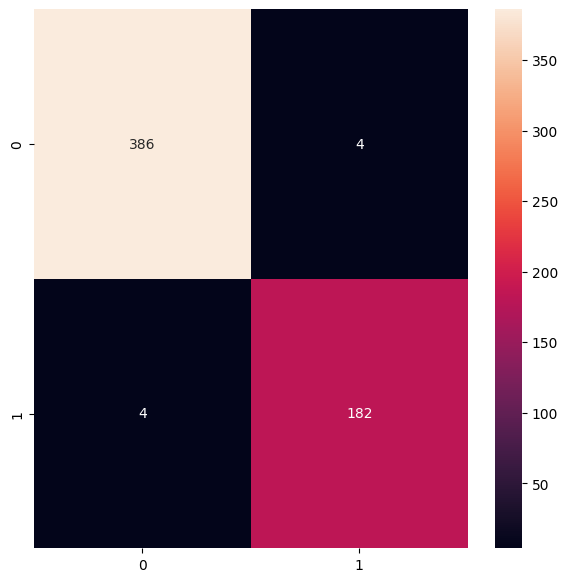

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True, fmt="d");

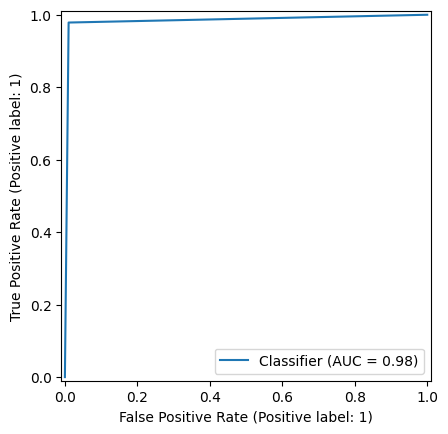

In [ ]:
original=original.astype("int")
predict=predict.astype("int")
RocCurveDisplay.from_predictions(original, predict);
